In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'walmart-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1820993%2F2970526%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240421%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240421T154530Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0799404f9922b157d6963c23c4be6e400f8ba6987d0720096ef34a81eb68ba511ba67a15d6f9fc958a891f80853d98ed8977578c755bd31c7a031cb69a8c77eebbaaffc620961dbbbe435fa419b16718eefa09512d59c98c9bc0c481b66037e3f42baa533cc2fc866d31d80a2ede4d3082fadb9ae7b5d1f56228d110bba3298f00e923060eaa20fa1b5f666138fb4d36fa7a7d05a2d35cdc9992ab7d5067b1c0c23497a8522baf4c991dcc4e1d2b320273a5fc06c106303523e38418fb0054ece2f40ec1946fb9ecff2dacd571571e0bed93f4f0d9e30e7d037fc7213934d75db3009b9a07029c8d9b1a3585f068876b8d8a90511e2c89a4435fe5ef7ac71a6f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-dataset/Walmart.csv


In [ ]:
data=pd.read_csv(r'/kaggle/input/walmart-dataset/Walmart.csv')
data.shape

(6435, 8)

In [ ]:
data.head(-1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667


In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<Axes: ylabel='Weekly_Sales'>

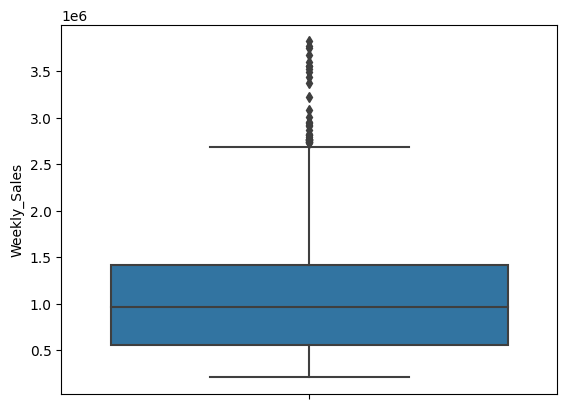

In [ ]:
sns.boxplot(y=data['Weekly_Sales'])

In [ ]:
def outlier_detection(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    filtered_data = column[~((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))]

    null_values_count = filtered_data.isnull().sum()

    return filtered_data, null_values_count

y = ['Weekly_Sales']
for col_name in y:
    filtered_data, null_values_count = outlier_detection(data[col_name])
    print(f"Outlier Detection Results for column '{col_name}':")
    print(f"Filtered Data Shape: {filtered_data.shape}")
    print(f"Null Values Count: {null_values_count}\n")


Outlier Detection Results for column 'Weekly_Sales':
Filtered Data Shape: (6401,)
Null Values Count: 0



In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year


yearly_data = data.groupby('Year')['Weekly_Sales'].sum().reset_index()

data['Year'].head()


0    2010
1    2010
2    2010
3    2010
4    2010
Name: Year, dtype: int32

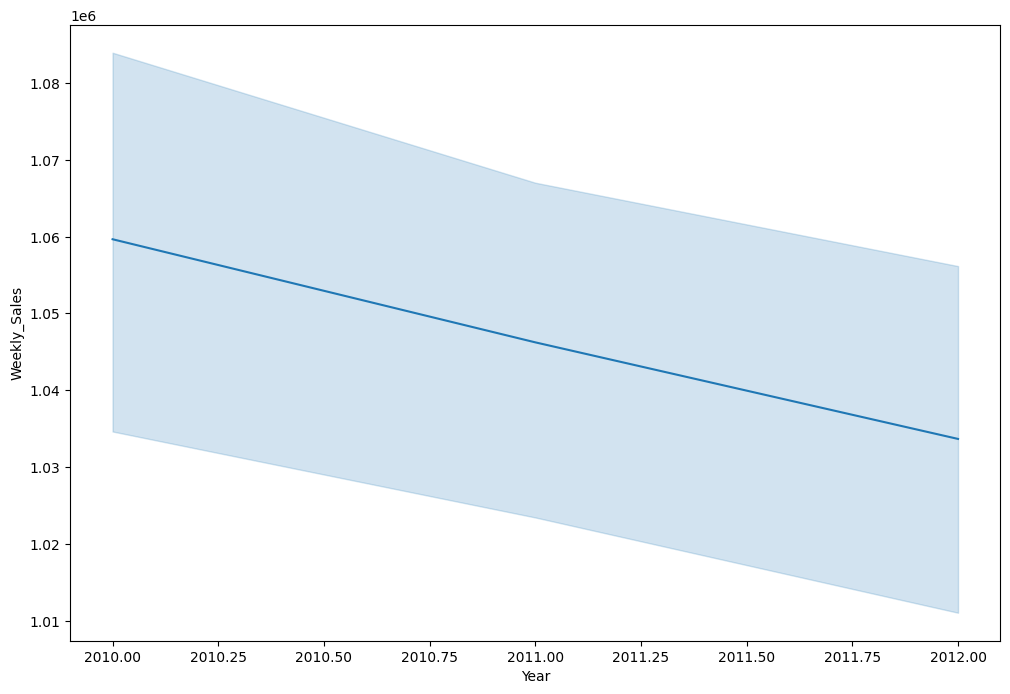

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

sns.lineplot(x=data['Year'],y=data['Weekly_Sales'])


plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


data['DayOfWeek'] = data['Date'].dt.dayofweek

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

data['DayOfWeek'] = data['Date'].dt.dayofweek


X = data.drop(['Weekly_Sales', 'Date'], axis=1)
y = data['Weekly_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2024-04-21 14:41:49.778488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 14:41:49.778622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 14:41:49.950442: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(8,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])


In [ ]:
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
    verbose=0,
)

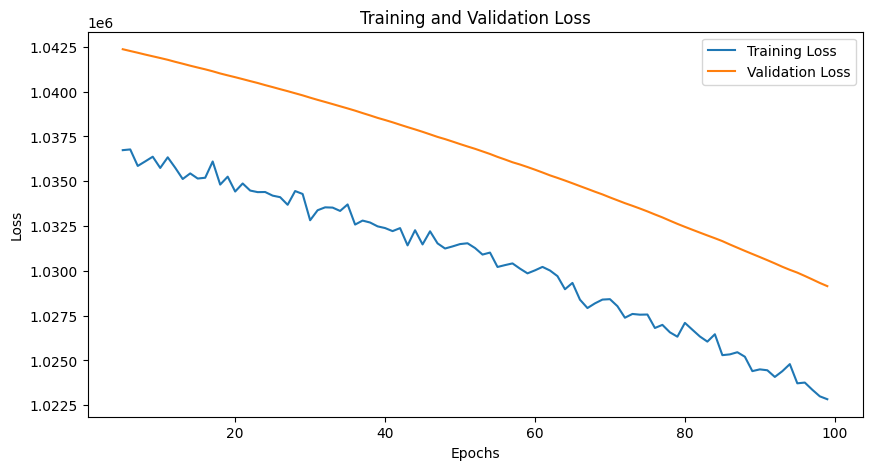

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



history_df = pd.DataFrame(history.history)


start_epoch = 5


plt.figure(figsize=(10, 5))
plt.plot(history_df.index[start_epoch:], history_df['loss'][start_epoch:], label='Training Loss')
plt.plot(history_df.index[start_epoch:], history_df['val_loss'][start_epoch:], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





In [ ]:
print(history)
